[INFO] 581 unique segments found
THE NUMBER OF CIRCLE GREATER THAN 50: 0


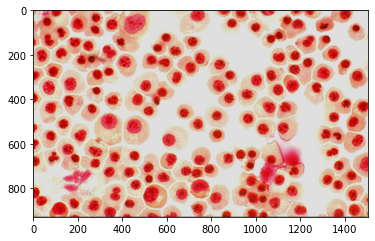

In [37]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage.feature import peak_local_max
import cv2
from skimage.segmentation import watershed
import imutils
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)



image = cv2.imread("RBC-stained.png")	

#converting into blur image
shifted = dst = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)

#converting into grayscale
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)

#binarizing the image
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# computing the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
# and return the matrix with the distance value in it. 
# basically it detect each cell in the image 
D = ndimage.distance_transform_edt(thresh)

# Returns the cordinate in the image where the pixel value is high 
# Helps to sperate the boundary in the image 
localMax = peak_local_max(D, indices=False, min_distance=1,labels=thresh)

# performing the connective component analysis
# count the number of object, return feature labled array
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]

labels = watershed(-D, markers, mask=thresh)
# return labels, Each pixel value as a unique label value,
# Pixels that have the same label value belong to the same object

print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
for label in np.unique(labels):
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
	#circling those area having radius greater than 50
	c = max(cnts, key=cv2.contourArea)
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	count = 0
	if(r>50):
		cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
		count = count +1
		#cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
print("THE NUMBER OF CIRCLE GREATER THAN 50:",count)
plt.imshow(image , cmap ="gray")